# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

### Challenges : To examine a set of job postings with salaries and then predict salaries for a new set of job postings.

In [31]:
#import your libraries
import pandas as pd
import sklearn as sk

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


#your info here
__author__ = "KIshan"
__email__ = "gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
test_features = pd.read_csv("./data/test_features.csv")
train_features = pd.read_csv("./data/train_features.csv")
train_salaries = pd.read_csv("./data/train_salaries.csv")

In [3]:
#Merge train_features and train_salaries
df=train_features.merge(train_salaries,how='left',on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [5]:
df.describe(include='all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685155717,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [6]:
df[df.duplicated()]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [7]:
(df['salary']<=0).sum() #No. of rows where salary<0.

5

### ---- 3 Clean the data ----

In [8]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
df.drop(df[df['salary']<=0].index, inplace=True) 

In [9]:
df.shape  # No missing or incorrect values

(999995, 9)

In [10]:
for i in df: # to Check NULL values
    print(i)
    print(pd.isnull(df[i]).value_counts())

jobId
False    999995
Name: jobId, dtype: int64
companyId
False    999995
Name: companyId, dtype: int64
jobType
False    999995
Name: jobType, dtype: int64
degree
False    999995
Name: degree, dtype: int64
major
False    999995
Name: major, dtype: int64
industry
False    999995
Name: industry, dtype: int64
yearsExperience
False    999995
Name: yearsExperience, dtype: int64
milesFromMetropolis
False    999995
Name: milesFromMetropolis, dtype: int64
salary
False    999995
Name: salary, dtype: int64


In [11]:
df.dtypes # To check dataTypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

### ---- 4 Explore the data (EDA) ----

In [12]:
#summarize each feature variable
#summarize the target variable
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [15]:
#look for correlation between each feature and the target
#look for correlation between features
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75) #141
IQR = Q3-Q1
IQR

53.0

In [18]:
#Below 25th quantile (Q1 - 1.5*IQR)
df[(df['salary'] < Q1 - (1.5*IQR))]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [22]:
# We can see which jobs are > 75th quantile
salary_Q3 = df[(df['salary'] > (Q3 + (1.5*IQR)))]
salary_Q3

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [25]:
#
salary_Q3.groupby(df['jobType']).count()['salary']

jobType
CEO               3227
CFO               1496
CTO               1488
JUNIOR              20
MANAGER            217
SENIOR              66
VICE_PRESIDENT     603
Name: salary, dtype: int64

In [26]:
salary_Q3[(salary_Q3.jobType == "JUNIOR")]
# Masters and Doctoral have higher pay.

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


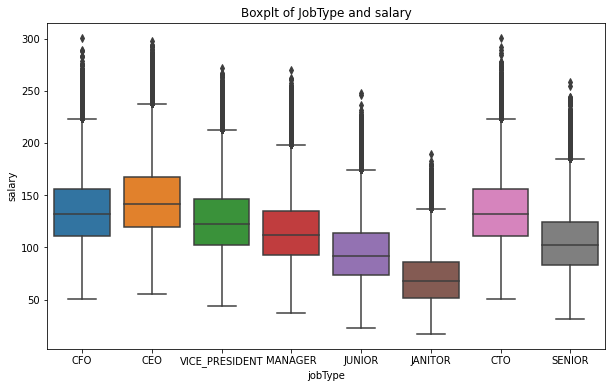

In [32]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='jobType', y='salary')
plt.title('Boxplt of JobType and salary')
plt.show()

CEO have higher pay.

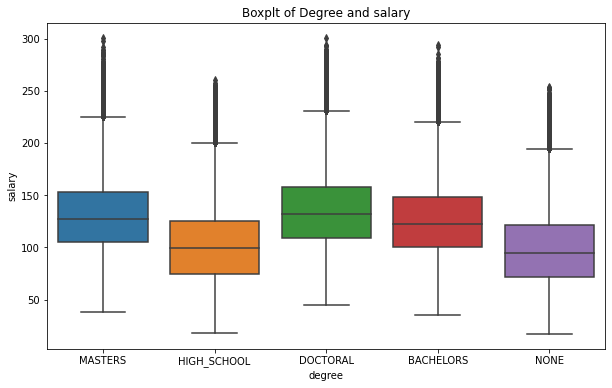

In [34]:
# Degree
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Boxplt of Degree and salary')
plt.show()

Masters and Doctoral have higher pay.

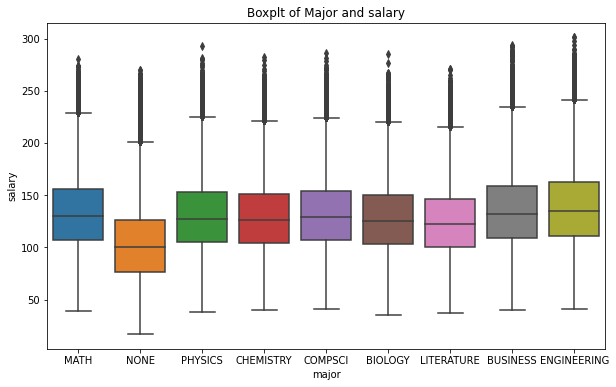

In [35]:
# Major
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='major', y='salary')
plt.title('Boxplt of Major and salary')
plt.show()

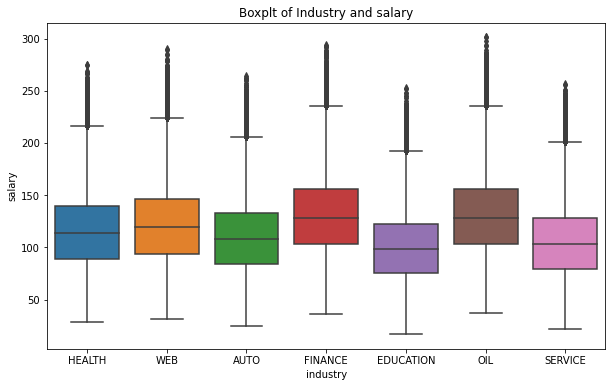

In [36]:
# Boxplt of Industry and salary
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='industry', y='salary')
plt.title('Boxplt of Industry and salary')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

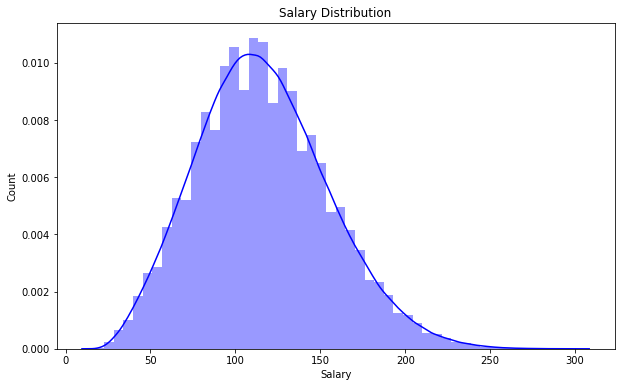

In [47]:
# Salary Distribution
fig=plt.figure(figsize=(10,6))
sns.distplot(df.salary, color='b')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data